In [ ]:
%load_ext autoreload

%autoreload 2

from lucifex.fdm import FunctionSeries, GridSeries, ConstantSeries, NumericSeries
from lucifex.io import find_dataset, filter_by_parameters, co_proxy
from co2_dissolution_pkg.postprocess.plot import *
from co2_dissolution_pkg.postprocess.co_plot import *


DATASET = find_dataset('./mesh_resolution', include='Nx=*')
PARAMETERS = 'PARAMETERS.txt'
FUNCTION_SERIES = 'FunctionSeries.h5'
CONSTANT_SERIES = 'ConstantSeries.h5'
GRID_SERIES = 'GridSeries.npz'
NUMERIC_SERIES = 'NumericSeries.npz'
FIGURES = 'figures'

: 

In [2]:
DATASET.directories

['./mesh_resolution/Nx=120|Ny=120|Ra=1000|Da=1000|sr=0.1__2025-09-04_02-10-31.107068/',
 './mesh_resolution/Nx=140|Ny=140|Ra=1000|Da=1000|sr=0.1__2025-09-04_02-10-31.155886/',
 './mesh_resolution/Nx=160|Ny=160|Ra=1000|Da=1000|sr=0.1__2025-09-04_02-10-31.252752/']

uMinMax ./mesh_resolution/Nx=120|Ny=120|Ra=1000|Da=1000|sr=0.1__2025-09-04_02-10-31.107068/ NumericSeries.npz
uMinMax ./mesh_resolution/Nx=140|Ny=140|Ra=1000|Da=1000|sr=0.1__2025-09-04_02-10-31.155886/ NumericSeries.npz
uMinMax ./mesh_resolution/Nx=160|Ny=160|Ra=1000|Da=1000|sr=0.1__2025-09-04_02-10-31.252752/ NumericSeries.npz


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$t$'>)

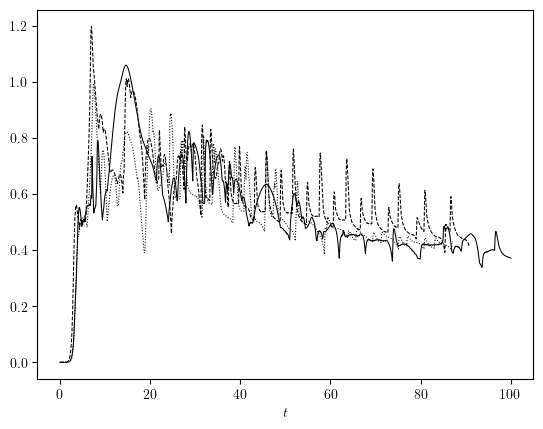

In [4]:
def make_uMax(uMinMax: NumericSeries):
    return NumericSeries([i[1] for i in uMinMax.series], uMinMax.time_series, 'uMax')

co_plot_timeseries(DATASET.directories)(
    co_proxy(make_uMax, ('uMinMax', NumericSeries, NUMERIC_SERIES))
)